In [1]:

# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



Using TensorFlow backend.


In [2]:
# reading csv file  
normal=pd.read_csv("ptbdb_normal.csv",header=None) 
normal.head(2) #for 2 rows
#normal.head() #for some top rows
#normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None) 
#abnormal

In [36]:
test=pd.read_csv("mitbih_test.csv",header=None) 
#test.head(2)
#test

In [37]:

train=pd.read_csv("mitbih_train.csv",header=None) 
train



,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [38]:
print("Type\tCount")
print((train[187]).value_counts())

#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [39]:
y_train=train[187].values
#y_train

y_test=test[187].values
#y_train



In [40]:
M = train.values
print(type(M))
X = M[:, :-1]
y = M[:, -1].astype(int)

<class 'numpy.ndarray'>


In [41]:
print(M.shape)
print(X.shape)
print(y.shape)

(87554, 188)
(87554, 187)
(87554,)


In [46]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()


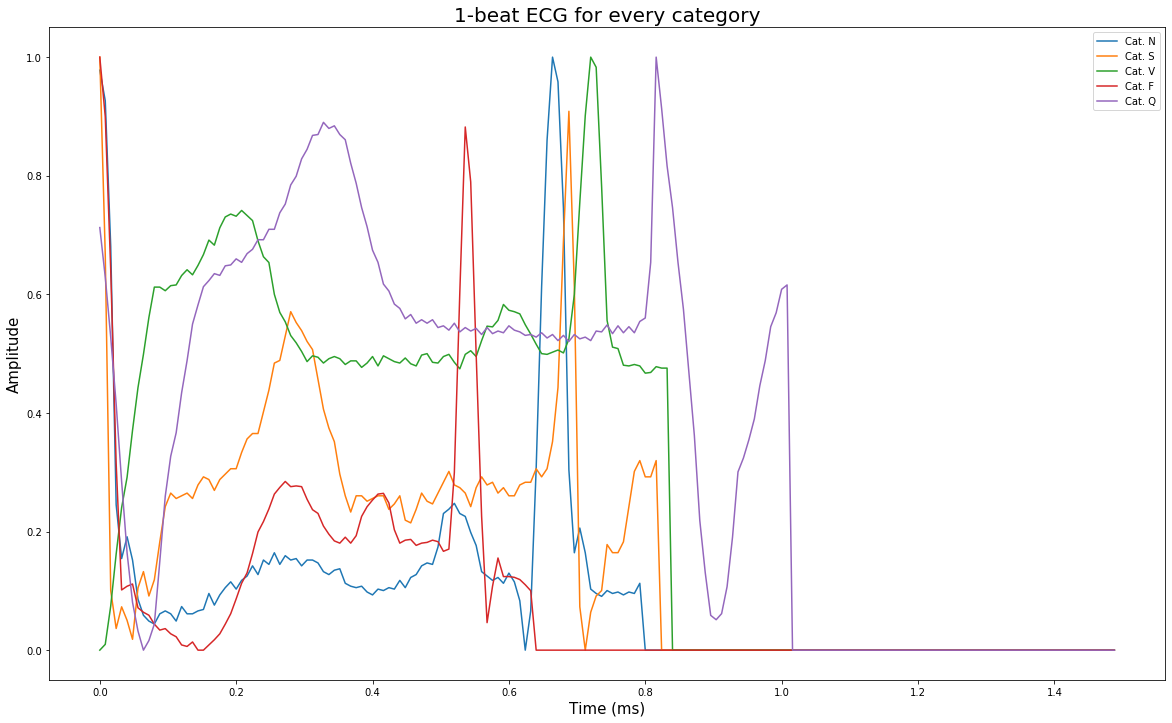

In [43]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X[C0, :][0], label="Cat. N")
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [7]:
'''y1=[]                              # making multiclass to binary class
for i in y:
  if i not in  [0.0]:
    y1.append(1)
    #print("value is",i)
  else:
    y1.append(0)
    #print("value",i)
    
#print(type(y1))    
#print(y1)'''

'y1=[]                              # making multiclass to binary class\nfor i in y:\n  if i not in  [0.0]:\n    y1.append(1)\n    #print("value is",i)\n  else:\n    y1.append(0)\n    #print("value",i)\n    \n#print(type(y1))    \n#print(y1)'

In [8]:
#train.drop(['187','186'], axis = 1, inplace = True)   #to drp more than 2 column
train.drop([187], axis = 1, inplace = True)  #removing last column from train dataset
#train

test.drop([187], axis = 1, inplace = True)   #removing last column from test dataset
#test

In [9]:
x_train=train.values

x_test=test.values

In [10]:
x_train.shape

(87554, 187)

In [11]:
#seed = 2
#np.random.seed(seed)

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)
#x_train, x_test, y_train, y_test = train_test_split(x,y1,test_size=0.2, random_state=2)

In [12]:
# SVM model
a_svm=svm.SVC(gamma='scale')
a_svm.fit(x_train,y_train)
y_pred_svm=a_svm.predict(x_test)


#from sklearn.metrics import classification_report, confusion_matrix
cm_svm=confusion_matrix(y_test,y_pred_svm)
print(cm_svm)
print("********************************")

report_svm=classification_report(y_test,y_pred_svm)
print(report_svm)

#Precision=TP/(TP+FP)
#Recall=TP/(TP+FN)
#F1 Score=(2*Recall*Precision)/(Recall+Precision)
#Accuracy=(TP+TN)/(TP+TN+FN+FP)
#Accuracy_Score_svm=accuracy_score(y_test,y_pred_svm)
#print('Average Accuracy:%0.2f +/- (%0.1f) %%' % (Accuracy_Score_svm.mean()*100, Accuracy_Score_svm.std()*100))


print("********************************")


Accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of svm is : {0}".format(Accuracy_svm))

F1_score_svm= f1_score(y_test, y_pred_svm,average='weighted')
print('F1_score of svm is : {0}'.format(F1_score_svm))

Recall_svm= recall_score(y_test, y_pred_svm,average='weighted')
print('Recall of svm is : {0}'.format(Recall_svm))
      
Precision_svm= precision_score(y_test, y_pred_svm,average='weighted')      
print('Precision of svm is : {0}'.format(Precision_svm))


[[18086    10    17     1     4]
 [  237   314     5     0     0]
 [  170     2  1249    25     2]
 [   71     0    13    78     0]
 [  135     0     8     0  1465]]
********************************
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892

********************************
Accuracy of svm is : 0.9680248492600037
F1_score of svm is : 0.9657306309108418
Recall of svm is : 0.9680248492600037
Precision of svm is : 0.9675831181181114


In [13]:
# Logistic Regression
a_lr=LogisticRegression()
a_lr.fit(x_train,y_train)
y_pred_lr=a_lr.predict(x_test)

cm_lr=confusion_matrix(y_test,y_pred_lr)
print(cm_lr)
print("********************************")

report_lr=classification_report(y_test,y_pred_lr)
print(report_lr)

print("********************************")

Precision_lr= precision_score(y_test, y_pred_lr,average='weighted')      
print('Precision of lr is : {0}'.format(Precision_lr))

Recall_lr= recall_score(y_test, y_pred_lr,average='weighted')
print('Recall of lr is : {0}'.format(Recall_lr))

F1_score_lr= f1_score(y_test, y_pred_lr,average='weighted')
print('F1_score of lr is : {0}'.format(F1_score_lr))

Accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of lr is : {0}".format(Accuracy_lr))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[17891    14   195     0    18]
 [  451    77    28     0     0]
 [  956    12   452     1    27]
 [  132     0    12    18     0]
 [  203     1    12     0  1392]]
********************************
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     18118
         1.0       0.74      0.14      0.23       556
         2.0       0.65      0.31      0.42      1448
         3.0       0.95      0.11      0.20       162
         4.0       0.97      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.84      0.48      0.54     21892
weighted avg       0.89      0.91      0.89     21892

********************************
Precision of lr is : 0.8939122826652415
Recall of lr is : 0.9058103416773251
F1_score of lr is : 0.8868453918167318
Accuracy of lr is : 0.9058103416773251


In [14]:
#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(x_train,y_train)
y_pred_nb=a_nb.predict(x_test)

cm_nb=confusion_matrix(y_test,y_pred_nb)
print(cm_nb)
print("********************************")

report_nb=classification_report(y_test,y_pred_nb)
print(report_nb)

print("********************************")

Precision_nb= precision_score(y_test, y_pred_nb,average='weighted')      
print('Precision of nb is : {0}'.format(Precision_nb))

Recall_nb= recall_score(y_test, y_pred_nb,average='weighted')
print('Recall of nb is : {0}'.format(Recall_nb))

F1_score_nb= f1_score(y_test, y_pred_nb,average='weighted')
print('F1_score of nb is : {0}'.format(F1_score_nb))

Accuracy_nb=accuracy_score(y_test, y_pred_nb)
print("Accuracy of nb is : {0}".format(Accuracy_nb))

      


[[ 2106    58  1151  2168 12635]
 [   44    78    32    51   351]
 [  127     9   281    80   951]
 [    0     0     1   134    27]
 [    1     0     5     9  1593]]
********************************
              precision    recall  f1-score   support

         0.0       0.92      0.12      0.21     18118
         1.0       0.54      0.14      0.22       556
         2.0       0.19      0.19      0.19      1448
         3.0       0.05      0.83      0.10       162
         4.0       0.10      0.99      0.19      1608

    accuracy                           0.19     21892
   macro avg       0.36      0.45      0.18     21892
weighted avg       0.80      0.19      0.20     21892

********************************
Precision of nb is : 0.7993528483474379
Recall of nb is : 0.1914854741458067
F1_score of nb is : 0.2036961033381654
Accuracy of nb is : 0.1914854741458067


In [15]:
#Stochastic Gradient Descent
a_sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
a_sgd.fit(x_train,y_train)
y_pred_sgd=a_sgd.predict(x_test)

cm_sgd=confusion_matrix(y_test,y_pred_sgd)
print(cm_sgd)
print("********************************")

report_sgd=classification_report(y_test,y_pred_sgd)
print(report_sgd)

print("********************************")

Precision_sgd= precision_score(y_test, y_pred_sgd,average='weighted')      
print('Precision of sgd is : {0}'.format(Precision_sgd))

Recall_sgd= recall_score(y_test, y_pred_sgd,average='weighted')
print('Recall of sgd is : {0}'.format(Recall_sgd))

F1_score_sgd= f1_score(y_test, y_pred_sgd,average='weighted')
print('F1_score of sgd is : {0}'.format(F1_score_sgd))

Accuracy_sgd=accuracy_score(y_test, y_pred_sgd)
print("Accuracy of sgd is : {0}".format(Accuracy_sgd))


[[18036     7    44     0    31]
 [  504    37    15     0     0]
 [ 1172     4   235     0    37]
 [  146     0     9     7     0]
 [  215     2     7     0  1384]]
********************************
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94     18118
         1.0       0.74      0.07      0.12       556
         2.0       0.76      0.16      0.27      1448
         3.0       1.00      0.04      0.08       162
         4.0       0.95      0.86      0.90      1608

    accuracy                           0.90     21892
   macro avg       0.87      0.43      0.46     21892
weighted avg       0.89      0.90      0.87     21892

********************************
Precision of sgd is : 0.8899691326136949
Recall of sgd is : 0.8998264206102686
F1_score of sgd is : 0.8695290051135668
Accuracy of sgd is : 0.8998264206102686


In [16]:
#K-Nearest Neighbours
a_knn=KNeighborsClassifier(n_neighbors=15)
a_knn.fit(x_train,y_train)
y_pred_knn=a_knn.predict(x_test)

cm_knn=confusion_matrix(y_test,y_pred_knn)
print(cm_knn)
print("********************************")

report_knn=classification_report(y_test,y_pred_knn)
print(report_knn)

print("********************************")

Precision_knn= precision_score(y_test, y_pred_knn,average='weighted')      
print('Precision of knn is : {0}'.format(Precision_knn))

Recall_knn= recall_score(y_test, y_pred_knn,average='weighted')
print('Recall of knn is : {0}'.format(Recall_knn))

F1_score_knn= f1_score(y_test, y_pred_knn,average='weighted')
print('F1_score of knn is : {0}'.format(F1_score_knn))

Accuracy_knn=accuracy_score(y_test, y_pred_knn)
print("Accuracy of knn is : {0}".format(Accuracy_knn))

[[18016    34    58     7     3]
 [  221   328     7     0     0]
 [  162     4  1257    23     2]
 [   48     0    13   101     0]
 [  102     0    11     0  1495]]
********************************
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18118
         1.0       0.90      0.59      0.71       556
         2.0       0.93      0.87      0.90      1448
         3.0       0.77      0.62      0.69       162
         4.0       1.00      0.93      0.96      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.80      0.85     21892
weighted avg       0.97      0.97      0.97     21892

********************************
Precision of knn is : 0.9672690579354417
Recall of knn is : 0.9682532431938607
F1_score of knn is : 0.9666247527352123
Accuracy of knn is : 0.9682532431938607


In [17]:
# Decision Binary Tree
a_dt=DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None, min_samples_leaf=15)
a_dt.fit(x_train,y_train)
y_pred_dt=a_dt.predict(x_test)

cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
print("********************************")

report_dt=classification_report(y_test,y_pred_dt)
print(report_dt)

print("********************************")

Precision_dt= precision_score(y_test, y_pred_dt,average='weighted')      
print('Precision of dt is : {0}'.format(Precision_dt))

Recall_dt= recall_score(y_test, y_pred_nb,average='weighted')
print('Recall of dt is : {0}'.format(Recall_dt))

F1_score_dt= f1_score(y_test, y_pred_dt,average='weighted')
print('F1_score of dt is : {0}'.format(F1_score_dt))

Accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of dt is : {0}".format(Accuracy_dt))

      


[[17959    40    72    13    34]
 [  250   290    11     1     4]
 [  290     6  1119    17    16]
 [   91     0     7    62     2]
 [  145     2    16     0  1445]]
********************************
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     18118
         1.0       0.86      0.52      0.65       556
         2.0       0.91      0.77      0.84      1448
         3.0       0.67      0.38      0.49       162
         4.0       0.96      0.90      0.93      1608

    accuracy                           0.95     21892
   macro avg       0.87      0.71      0.78     21892
weighted avg       0.95      0.95      0.95     21892

********************************
Precision of dt is : 0.9511834965469488
Recall of dt is : 0.1914854741458067
F1_score of dt is : 0.9503428380951064
Accuracy of dt is : 0.9535446738534624


In [18]:
# Random Forest Classifier
a_rf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
a_rf.fit(x_train,y_train)
y_pred_rf=a_rf.predict(x_test)


cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
print("********************************")

report_rf=classification_report(y_test,y_pred_rf)
print(report_rf)

print("********************************")

Precision_rf= precision_score(y_test, y_pred_rf,average='weighted')      
print('Precision of rf model is : {0}'.format(Precision_rf))

Recall_rf= recall_score(y_test, y_pred_rf,average='weighted')
print('Recall of rf model is : {0}'.format(Recall_rf))

F1_score_rf= f1_score(y_test, y_pred_rf,average='weighted')
print('F1_score of rf model is : {0}'.format(F1_score_rf))

Accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of rf model is : {0}".format(Accuracy_rf))


[[18037    15    35     2    29]
 [  262   285     7     0     2]
 [  235     2  1180    14    17]
 [   66     0    22    74     0]
 [  129     0     9     0  1470]]
********************************
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18118
         1.0       0.94      0.51      0.66       556
         2.0       0.94      0.81      0.87      1448
         3.0       0.82      0.46      0.59       162
         4.0       0.97      0.91      0.94      1608

    accuracy                           0.96     21892
   macro avg       0.93      0.74      0.81     21892
weighted avg       0.96      0.96      0.96     21892

********************************
Precision of rf model is : 0.9605002128785236
Recall of rf model is : 0.9613557463913759
F1_score of rf model is : 0.958338004220718
Accuracy of rf model is : 0.9613557463913759


In [19]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes','Stochastic Gradient Descent'],
    'Accuracy'    : [Accuracy_lr,   Accuracy_dt,   Accuracy_svm,    Accuracy_rf,   Accuracy_knn,   Accuracy_nb,   Accuracy_sgd],
    'Precision'   : [Precision_lr,  Precision_dt,  Precision_svm,   Precision_rf,  Precision_knn,  Precision_nb,  Precision_sgd],
    'Recall'      : [Recall_lr,     Recall_dt,     Recall_svm,      Recall_rf,     Recall_knn,     Recall_nb,     Recall_sgd],
    'F1_score'    : [F1_score_lr,   F1_score_dt,   F1_score_svm,    F1_score_rf,   F1_score_knn,   F1_score_nb,   F1_score_sgd],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score
4,K-Nearest Neighbors,0.968253,0.967269,0.968253,0.966625
2,Support Vector Machine,0.968025,0.967583,0.968025,0.965731
3,Random Forest,0.961356,0.960500,0.961356,0.958338
1,Decision Tree,0.953545,0.951183,0.191485,0.950343
0,Logistic Regression,0.905810,0.893912,0.905810,0.886845
6,Stochastic Gradient Descent,0.899826,0.889969,0.899826,0.869529
5,Naive Bayes,0.191485,0.799353,0.191485,0.203696
